<a href="https://colab.research.google.com/github/natnuo/AudioPolo/blob/main/AlgoverseLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab Specification: https://docs.google.com/document/d/1frv7crx4VCLw5je84qXyvrj5cB6k_hW0QWOWhFyAwbc/edit

Partner Project with Trisha

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Step 1

In [2]:
digits = load_digits()

In [3]:
# Display a description of the dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 640x480 with 0 Axes>

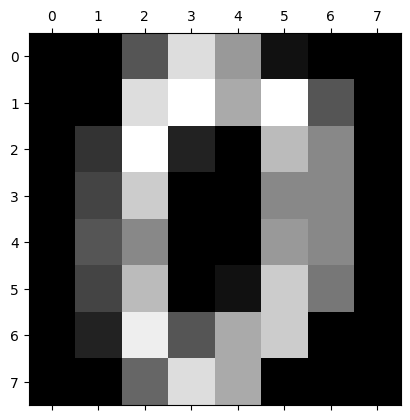

In [4]:
# Display the first digit in the dataset as an image
plt.gray()
plt.matshow(digits.images[0])
plt.show()

Step 2

In [5]:
# Display the keys of the dataset to understand its structure
print(digits.keys())

# Display the shape of the data and target arrays
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")

# Display the first few entries in the data array
print("First 5 entries in the data array:")
print(digits.data[:5])

# Display the corresponding target values for the first few entries
print("First 5 target values:")
print(digits.target[:5])

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Target shape: (1797,)
First 5 entries in the data array:
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0. 

Step 3

In [6]:
# Convert digits to a dataframe
df = pd.DataFrame(digits.data, columns=digits.feature_names)

# Add the target column to the DataFrame
df['target'] = digits.target

Step 4

In [7]:
# Define features and target
X = digits.data
y = digits.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1437, 64)
X_test shape: (360, 64)
y_train shape: (1437,)
y_test shape: (360,)


Step 5

In [8]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=10000, random_state=42)

Step 6

In [9]:
# Train the logistic regression model
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Step 7

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

Step 8

In [11]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9722222222222222


Confusion Matrix

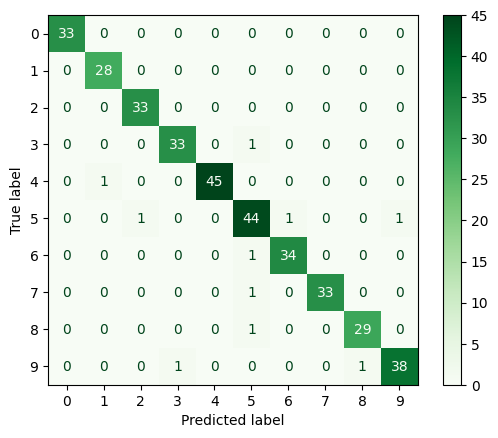

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Greens)
plt.show()

Different Models

In [13]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import random

In [14]:
models = {
    "Support Vector Machine": svm.SVC(),
    "Stochastic Gradient Descent": SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
    "Nearest Neighbors": KNeighborsClassifier()
}

In [15]:
colors = [plt.cm.Blues, plt.cm.Greens, plt.cm.Reds]

Support Vector Machine Accuracy: 0.9861111111111112


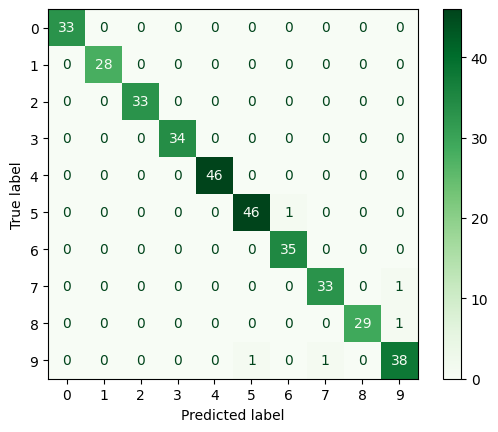

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Stochastic Gradient Descent Accuracy: 0.9555555555555556


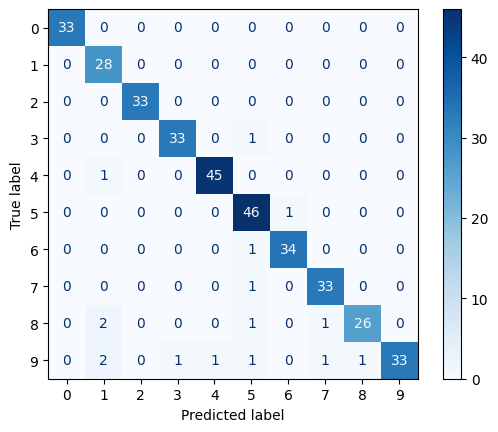

Nearest Neighbors Accuracy: 0.9861111111111112


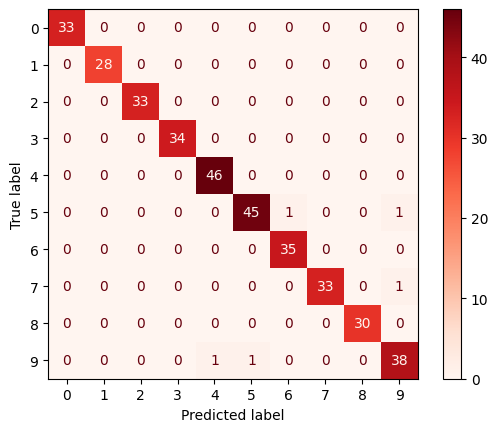

In [16]:
for model_name in models:
  model = models[model_name]
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model_name} Accuracy: {accuracy}")

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
  disp.plot(cmap=colors[random.randint(0, len(colors)-1)])
  plt.show()
